## Closures
A closure is a function with an extended scope that encompasses nonglobal variables referenced in the body of the function but not defined there.

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
%%writefile average_oo.py
class Averager():
    def __init__(self):
        self.series = []
        
    def __call__(self, new_value):
        self.series.append(new_value)
        total = sum(self.series)
        return total / len(self.series)

Overwriting average_oo.py


In [14]:
from average_oo import Averager
avg = Averager()
print(avg(12))
print(avg(10))
print(avg(9))

12.0
11.0
10.333333333333334


Functional implementation, using the higher-order function `make_averager`:

In [15]:
%%writefile average.py
def make_averager():
    series = []
    
    def averager(new_value):
        series.append(new_value)
        total = sum(series)
        return total / len(series)
    return averager

Writing average.py


In [16]:
from average import make_averager

When invoked, `make_averager` returns an `averager` function object. Each time an `averager` is called, it appends the passed argument to the series, and computes the current average.

In [17]:
avg = make_averager()
print(avg(10))
print(avg(11))
print(avg(12))

10.0
10.5
11.0


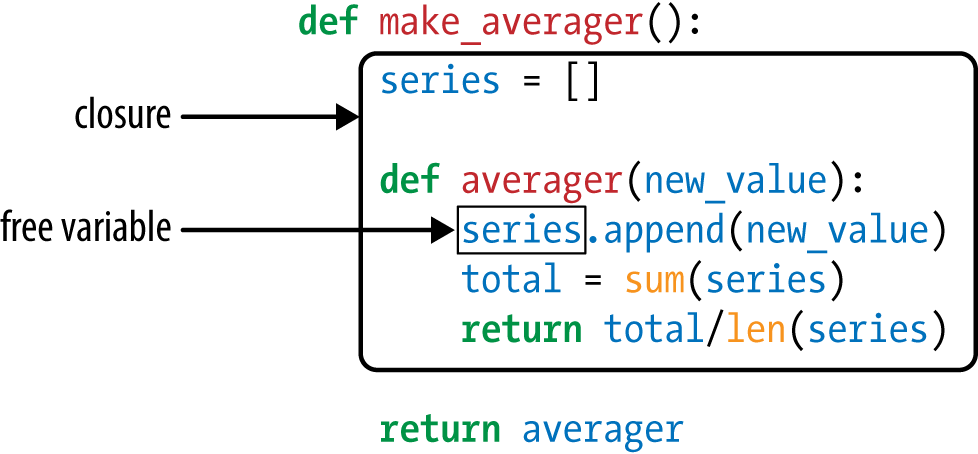

Inspecting the returned `averager` object shows how Python keeps the names of local and free variables in the `__code__` attribute that represents the compiled body of the function.

In [18]:
avg.__code__.co_varnames

('new_value', 'total')

In [19]:
avg.__code__.co_freevars

('series',)

The binding for `series` is kept in the `__closure__` attribute of the returned function `avg`. Each item in `avg.__closure__` corresponds to a name in `avg.__code__.co_freevars`. These items are `cells` and they have an attribute called `cell_contents` where the actual value can be found.

In [20]:
avg.__code__.co_freevars

('series',)

In [21]:
avg.__closure__

(<cell at 0x7f6ec945a408: list object at 0x7f6ec9661b08>,)

In [22]:
avg.__closure__[0].cell_contents

[10, 11, 12]

### Summary
A **closure** is a function that retains the bindings of the free variables that exist when the function is defined, so that they can be used later when the function is invoked and the defining scope is no longer available.

The only situation in which a function may need to deal with external variables that are nonglobal is when it is nested in another function.

## Nonlocal
The `nonlocal` declaration lets you flag a variable as a free variable even when it is assigned a new value within the function. If a new value is assigned to a `nonlocal` variable, the binding stored in the closure is changed.

In [23]:
def make_averager():
    count = 0
    total = 0
    def averager(new_value):
        nonlocal count, total
        count += 1
        total += new_value
        return total / count
    return averager

In [24]:
avg2 = make_averager()

In [25]:
avg2(10)

10.0

In [26]:
avg2(11)

10.5

In [27]:
avg2.__code__.co_freevars

('count', 'total')

In [28]:
avg2.__closure__[0].cell_contents

2

In [29]:
avg2.__closure__[1].cell_contents

21